In [2]:
import json
import matplotlib.pyplot as plt

# Load JSON data
with open("horusec-report.json") as file:
    data = json.load(file)

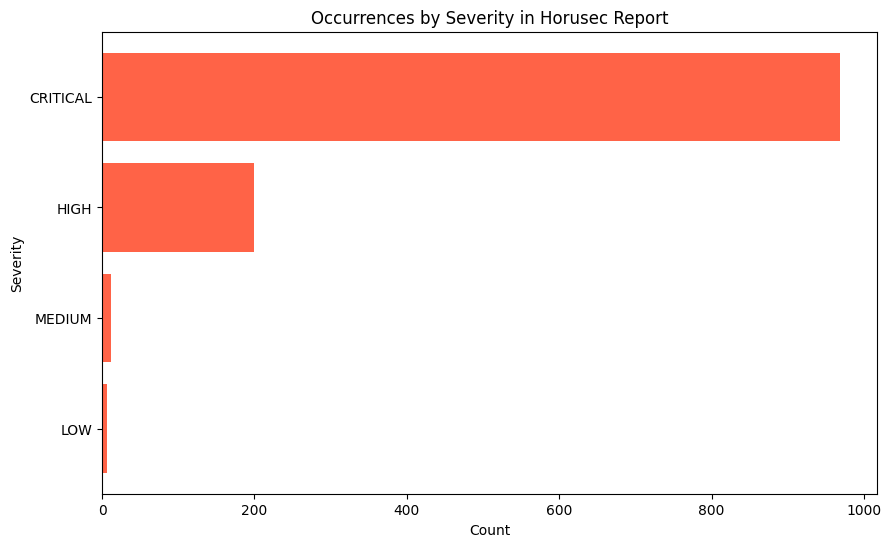

Occurrences by Severity:
CRITICAL: 969
HIGH: 200
MEDIUM: 11
LOW: 6


In [3]:
# Extract vulnerabilities
vulnerabilities = [item['vulnerabilities'] for item in data.get('analysisVulnerabilities', [])]

# Count occurrences by severity
severity_counts = {}
for vuln in vulnerabilities:
    severity = vuln.get("severity", "unknown")
    severity_counts[severity] = severity_counts.get(severity, 0) + 1

# Prepare data for plotting
severities = sorted(severity_counts.keys(), key=lambda x: severity_counts[x], reverse=True)
counts = [severity_counts[sev] for sev in severities]

# Plot occurrences by severity
plt.figure(figsize=(10, 6))
plt.barh(severities, counts, color='tomato')
plt.title("Occurrences by Severity in Horusec Report")
plt.xlabel("Count")
plt.ylabel("Severity")
plt.gca().invert_yaxis()
plt.show()

# Print the counts for each severity
print("Occurrences by Severity:")
for severity, count in severity_counts.items():
    print(f"{severity}: {count}")

In [4]:
file_counts = {}
for vuln in vulnerabilities:
    file_path = vuln.get("file", "unknown")
    file_counts[file_path] = file_counts.get(file_path, 0) + 1

# Sort by count
sorted_file_counts = dict(sorted(file_counts.items(), key=lambda item: item[1], reverse=True))

# Prepare data for plotting
files = list(sorted_file_counts.keys())
counts = list(sorted_file_counts.values())


# Print the counts for each file
print("Occurrences by File:")
for file, count in sorted_file_counts.items():
    print(f"{file}: {count}")

Occurrences by File:
frontend/.angular/cache/15.2.11/angular-webpack/d3f4f1038e1ecd56f88f9aa8fa3ff477a4eb33ef/0.pack: 229
data/static/users.yml: 20
build/test/api/quantityApiSpec.js: 17
test/api/quantityApiSpec.ts: 17
frontend/dist/frontend/assets/private/three.js: 12
frontend/src/assets/private/three.js: 12
build/test/api/loginApiSpec.js: 11
frontend/src/assets/i18n/nl_NL.json: 11
frontend/src/assets/i18n/uk_UA.json: 11
frontend/src/assets/i18n/ga_IE.json: 11
frontend/src/assets/i18n/id_ID.json: 11
frontend/src/assets/i18n/it_IT.json: 11
test/api/loginApiSpec.ts: 11
frontend/src/assets/i18n/bn_BD.json: 11
frontend/dist/frontend/assets/i18n/bn_BD.json: 11
frontend/src/assets/i18n/tlh_AA.json: 11
frontend/src/assets/i18n/en.json: 11
frontend/dist/frontend/assets/i18n/en.json: 11
frontend/dist/frontend/assets/i18n/it_IT.json: 11
frontend/dist/frontend/assets/i18n/id_ID.json: 11
frontend/dist/frontend/assets/i18n/nl_NL.json: 11
frontend/dist/frontend/assets/i18n/uk_UA.json: 11
frontend/di

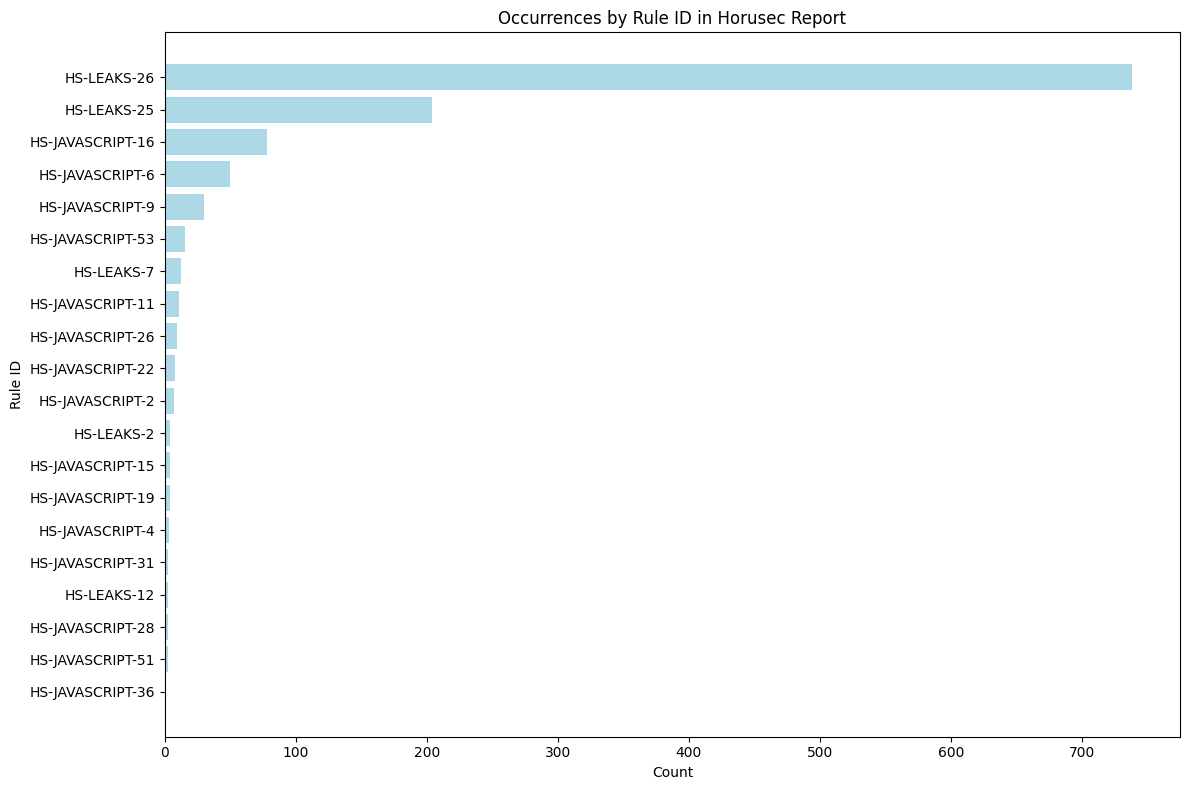

Occurrences by Rule ID:
HS-LEAKS-26: 738
HS-LEAKS-25: 204
HS-JAVASCRIPT-16: 78
HS-JAVASCRIPT-6: 50
HS-JAVASCRIPT-9: 30
HS-JAVASCRIPT-53: 15
HS-LEAKS-7: 12
HS-JAVASCRIPT-11: 11
HS-JAVASCRIPT-26: 9
HS-JAVASCRIPT-22: 8
HS-JAVASCRIPT-2: 7
HS-LEAKS-2: 4
HS-JAVASCRIPT-15: 4
HS-JAVASCRIPT-19: 4
HS-JAVASCRIPT-4: 3
HS-JAVASCRIPT-31: 2
HS-LEAKS-12: 2
HS-JAVASCRIPT-28: 2
HS-JAVASCRIPT-51: 2
HS-JAVASCRIPT-36: 1


In [5]:
# Count occurrences by rule_id
rule_counts = {}
for vuln in vulnerabilities:
    rule_id = vuln.get("rule_id", "unknown")
    rule_counts[rule_id] = rule_counts.get(rule_id, 0) + 1

# Sort by count
sorted_rule_counts = dict(sorted(rule_counts.items(), key=lambda item: item[1], reverse=True))

# Prepare data for plotting
rules = list(sorted_rule_counts.keys())
counts = list(sorted_rule_counts.values())

# Plot occurrences by rule_id
plt.figure(figsize=(12, 8))
plt.barh(rules, counts, color='lightblue')
plt.title("Occurrences by Rule ID in Horusec Report")
plt.xlabel("Count")
plt.ylabel("Rule ID")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# Print the counts for each rule_id
print("Occurrences by Rule ID:")
for rule_id, count in sorted_rule_counts.items():
    print(f"{rule_id}: {count}")


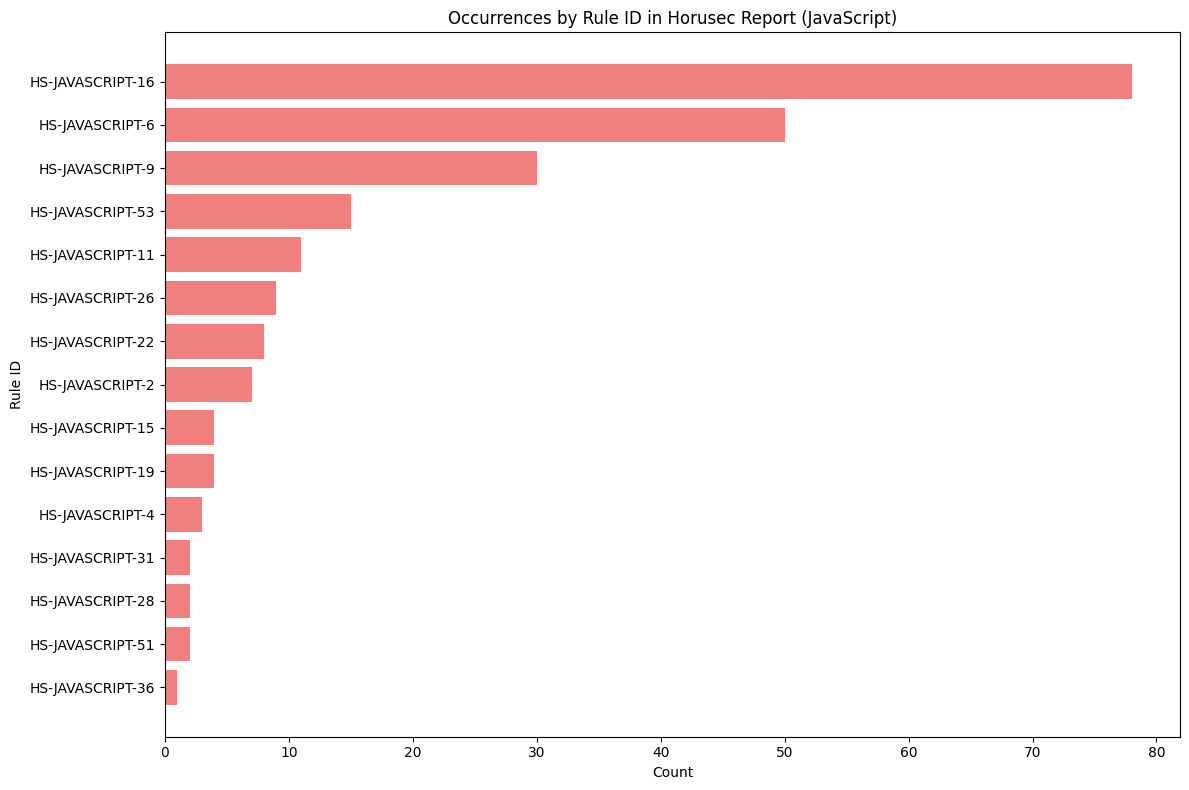

Occurrences by Rule ID for JavaScript:
HS-JAVASCRIPT-16: 78
HS-JAVASCRIPT-6: 50
HS-JAVASCRIPT-9: 30
HS-JAVASCRIPT-53: 15
HS-JAVASCRIPT-11: 11
HS-JAVASCRIPT-26: 9
HS-JAVASCRIPT-22: 8
HS-JAVASCRIPT-2: 7
HS-JAVASCRIPT-15: 4
HS-JAVASCRIPT-19: 4
HS-JAVASCRIPT-4: 3
HS-JAVASCRIPT-31: 2
HS-JAVASCRIPT-28: 2
HS-JAVASCRIPT-51: 2
HS-JAVASCRIPT-36: 1


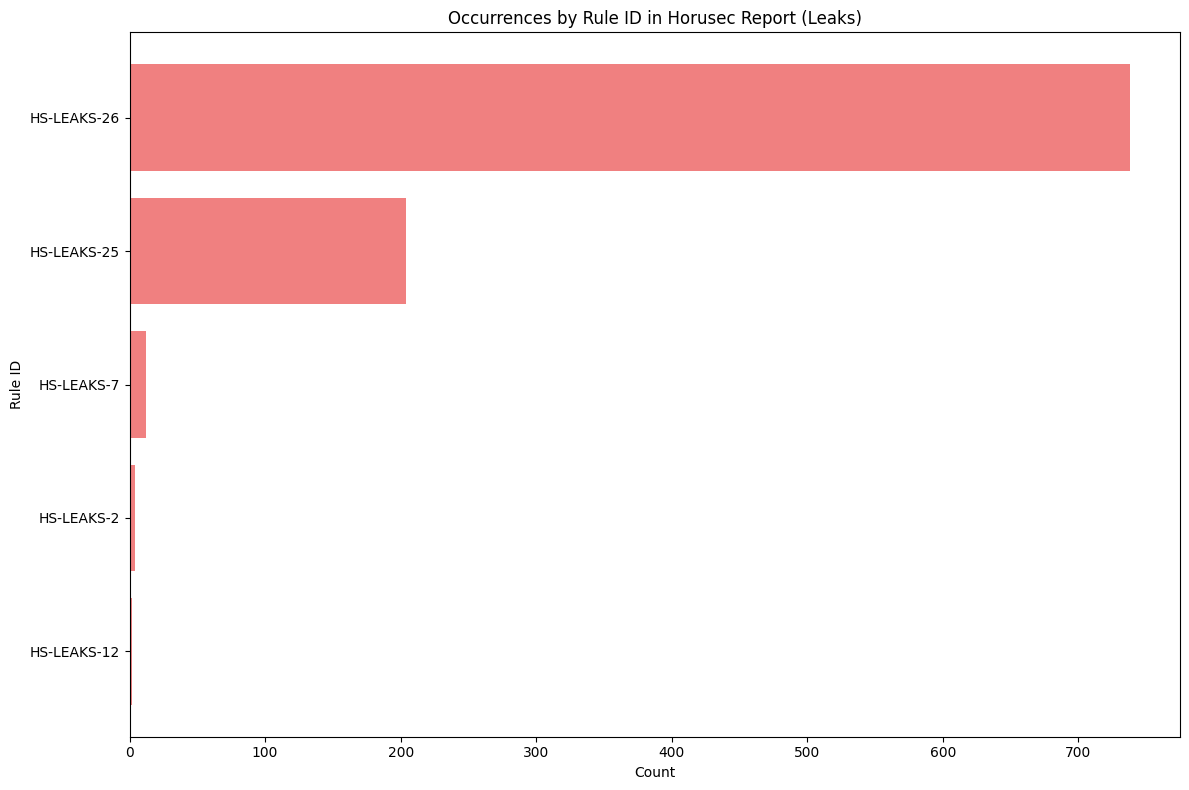

Occurrences by Rule ID for Leaks:
HS-LEAKS-26: 738
HS-LEAKS-25: 204
HS-LEAKS-7: 12
HS-LEAKS-2: 4
HS-LEAKS-12: 2


In [6]:
# Count occurrences by language and rule_id
language_rule_counts = {}
for vuln in vulnerabilities:
    language = vuln.get("language", "unknown")
    rule_id = vuln.get("rule_id", "unknown")
    
    if language not in language_rule_counts:
        language_rule_counts[language] = {}
    
    language_rule_counts[language][rule_id] = language_rule_counts[language].get(rule_id, 0) + 1

# Plot and display counts for each language
for language, rule_counts in language_rule_counts.items():
    # Sort by count
    sorted_rule_counts = dict(sorted(rule_counts.items(), key=lambda item: item[1], reverse=True))

    # Prepare data for plotting
    rules = list(sorted_rule_counts.keys())
    counts = list(sorted_rule_counts.values())

    # Plot occurrences by rule_id for the current language
    plt.figure(figsize=(12, 8))
    plt.barh(rules, counts, color='lightcoral')
    plt.title(f"Occurrences by Rule ID in Horusec Report ({language})")
    plt.xlabel("Count")
    plt.ylabel("Rule ID")
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()

    # Print the counts for each rule_id
    print(f"Occurrences by Rule ID for {language}:")
    for rule_id, count in sorted_rule_counts.items():
        print(f"{rule_id}: {count}")


In [16]:


# Load JSON data from the file
with open("horusec-report.json", "r") as file:
    data = json.load(file)
# Filter vulnerabilities where language is NOT "Leaks"
filtered_vulnerabilities = [
    vuln["vulnerabilities"] for vuln in data.get("analysisVulnerabilities", [])
    if vuln["vulnerabilities"].get("language", "").lower() != "leaks"
]

# Group files by rule_id and collect details
rule_id_data = {}
for vuln in filtered_vulnerabilities:
    rule_id = vuln.get("rule_id", "unknown")
    file_path = vuln.get("file", "unknown")
    details = vuln.get("details", "No details available")
    
    if rule_id not in rule_id_data:
        rule_id_data[rule_id] = {"files": set(), "details": details}
    
    rule_id_data[rule_id]["files"].add(file_path)

# Print results
for rule_id, data in rule_id_data.items():
    print(f"\nRule ID: {rule_id}")
    print(f"Details: {data['details']}")
    print("Affected Files:")
    for file in sorted(data["files"]):
        print(f"  - {file}")



Rule ID: HS-JAVASCRIPT-2
Details: (1/1) * Possible vulnerability detected: No use eval
The eval function is extremely dangerous. Because if any user input is not handled correctly and passed to it, it will be possible to execute code remotely in the context of your application (RCE - Remote Code Executuion). For more information checkout the CWE-94 (https://cwe.mitre.org/data/definitions/94.html) advisory.
Affected Files:
  - build/routes/captcha.js
  - build/routes/userProfile.js
  - build/test/cypress/e2e/basket.spec.js
  - build/test/cypress/e2e/contact.spec.js
  - routes/captcha.ts
  - routes/userProfile.ts
  - test/cypress/e2e/contact.spec.ts

Rule ID: HS-JAVASCRIPT-31
Details: (1/1) * Possible vulnerability detected: JWT should be signed and verified with strong cipher algorithms
If a JSON Web Token (JWT) is not signed with a strong cipher algorithm (or not signed at all) an attacker can forge it and impersonate user identities. Don't use none algorithm to sign or verify the val

In [17]:


# Load JSON data from the file
with open("horusec-report.json", "r") as file:
    data = json.load(file)

# Filter vulnerabilities where language is "Leaks"
filtered_vulnerabilities = [
    vuln["vulnerabilities"] for vuln in data.get("analysisVulnerabilities", [])
    if vuln["vulnerabilities"].get("language", "").lower() == "leaks".lower()
]

# Group files by rule_id and collect details
rule_id_data = {}
for vuln in filtered_vulnerabilities:
    rule_id = vuln.get("rule_id", "unknown")
    file_path = vuln.get("file", "unknown")
    details = vuln.get("details", "No details available")
    
    if rule_id not in rule_id_data:
        rule_id_data[rule_id] = {"files": set(), "details": details}
    
    rule_id_data[rule_id]["files"].add(file_path)

# Print results
for rule_id, data in rule_id_data.items():
    print(f"\nRule ID: {rule_id}")
    print(f"Details: {data['details']}")
    print("Affected Files:")
    for file in sorted(data["files"]):
        print(f"  - {file}")




Rule ID: HS-LEAKS-12
Details: (1/1) * Possible vulnerability detected: Asymmetric Private Key
Found SSH and/or x.509 Cerficates among the files of your project, make sure you want this kind of information inside your Git repo, since it can be missused by someone with access to any kind of copy.  For more information checkout the CWE-312 (https://cwe.mitre.org/data/definitions/312.html) advisory.
Affected Files:
  - build/lib/insecurity.js
  - lib/insecurity.ts

Rule ID: HS-LEAKS-26
Details: (1/1) * Possible vulnerability detected: Hard-coded password
The software contains hard-coded credentials, such as a password or cryptographic key, which it uses for its own inbound authentication, outbound communication to external components, or encryption of internal data. For more information checkout the CWE-798 (https://cwe.mitre.org/data/definitions/798.html) advisory.
Affected Files:
  - build/routes/changePassword.js
  - build/routes/login.js
  - build/routes/resetPassword.js
  - build/tes